In [1]:
#Load neccesary libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing & clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#load dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#shape of data set
df.shape

(7787, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Check missing values in each column
df.isna().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
#dropping unnecessary columns and the columns which can't be imputed
df = df.drop(columns=['show_id', 'director'])


In [9]:
#missing values
df.isna().sum()

type              0
title             0
cast            718
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
#checking type data column
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [12]:
#creating new columns movie and tv show 
df['is_movie'] = (df['type'] == 'Movie').astype(int)
df['is_tv_show'] = (df['type'] == 'TV Show').astype(int)


In [13]:
df.head(5)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,is_movie,is_tv_show
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,1
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,0
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,0
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,0
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,0


In [14]:
#checking title column
df['title'].nunique()

7787

In [15]:
#checking cast column
df['cast'].isna().sum()

np.int64(718)

In [16]:
#checking country column
df['country'].isna().sum()

np.int64(507)

In [17]:
#replacing missing country with unknown
df['country'] = df['country'].fillna('Unknown')


In [18]:
#checking date added column
df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [19]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [20]:
#column after converting 
df['date_added'].head(3)

0   2020-08-14
1   2016-12-23
2   2018-12-20
Name: date_added, dtype: datetime64[ns]

In [21]:
#checking release year column
df['release_year'].nunique()

73

In [22]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [23]:
#checking rating column
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
df['rating'].isna().sum()

np.int64(7)

In [25]:
# Drop rows with missing rating
df = df.dropna(subset=['rating'])


In [26]:
#creating new column rating group (kids,teen,adulst)
rating_map = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'TV-G': 'Kids', 'G': 'Kids',
    'PG': 'Teens', 'TV-PG': 'Teens', 'PG-13': 'Teens', 'TV-14': 'Teens',
    'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults', 'UR': 'Adults', 'NR': 'Adults'
}

df['rating_group'] = df['rating'].map(rating_map)


In [27]:
df.columns

Index(['type', 'title', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'is_movie',
       'is_tv_show', 'rating_group'],
      dtype='object')

In [28]:
#column duration
df['duration'].nunique()

216

In [29]:
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

In [30]:
#creating separate columns for tvshows and movie 
# Initialize columns
df['movie_duration_min'] = np.nan
df['tv_seasons'] = np.nan

# Movies → minutes
df.loc[df['type'] == 'Movie', 'movie_duration_min'] = (
    df.loc[df['type'] == 'Movie', 'duration']
      .str.extract(r'(\d+)')[0]
      .astype(float)
)

# TV Shows → seasons
df.loc[df['type'] == 'TV Show', 'tv_seasons'] = (
    df.loc[df['type'] == 'TV Show', 'duration']
      .str.extract(r'(\d+)')[0]
      .astype(float)
)


In [31]:
#checking listenin(genre) columns
df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [32]:
#we create genre columns in last after eda so noise will not be added
df['listed_in'].nunique()

492

In [33]:
#checking description column
df['description'].isna().sum()

np.int64(0)

In [34]:
# Check data type of a single column
df['description'].dtype


dtype('O')

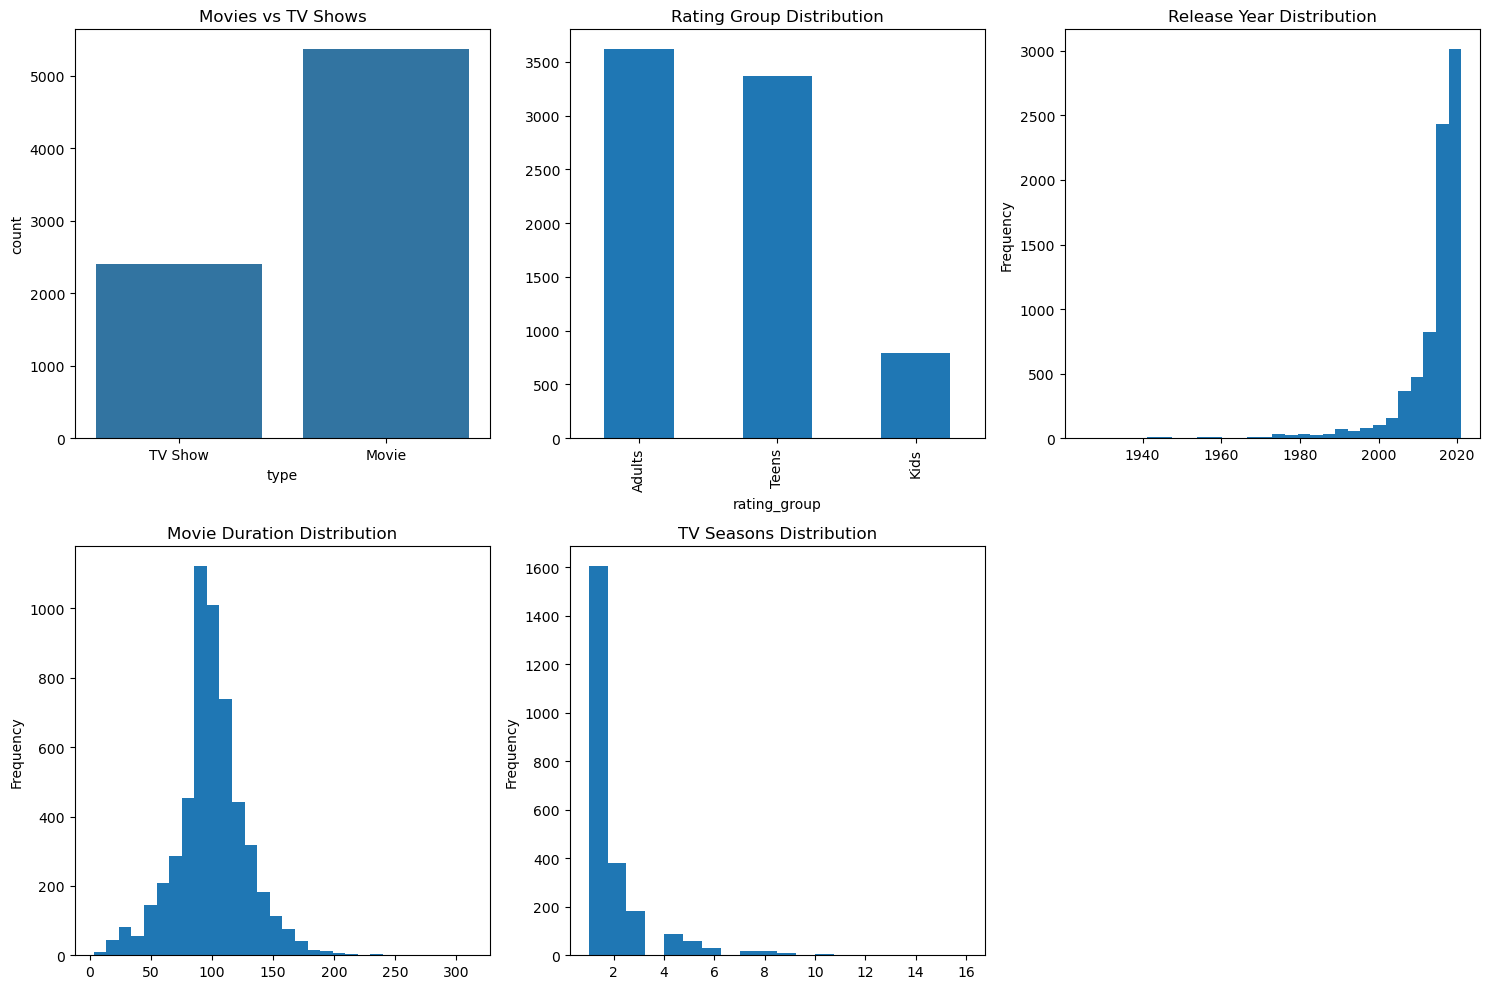

In [35]:
# UNIVARIATE ANALYSIS
# Purpose: Understand individual variable distributions and data balance

plt.figure(figsize=(15, 10))

# Important to know content balance (Movie vs TV Show)
plt.subplot(2,3,1)
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')

# Important to understand target audience distribution
plt.subplot(2,3,2)
df['rating_group'].value_counts().plot(kind='bar')
plt.title('Rating Group Distribution')

# Important to see content production trend over years
plt.subplot(2,3,3)
df['release_year'].plot(kind='hist', bins=30)
plt.title('Release Year Distribution')

# Important to understand movie length patterns
plt.subplot(2,3,4)
df['movie_duration_min'].dropna().plot(kind='hist', bins=30)
plt.title('Movie Duration Distribution')

# Important to see how many seasons TV shows usually have
plt.subplot(2,3,5)
df['tv_seasons'].dropna().plot(kind='hist', bins=20)
plt.title('TV Seasons Distribution')

plt.tight_layout()
plt.show()


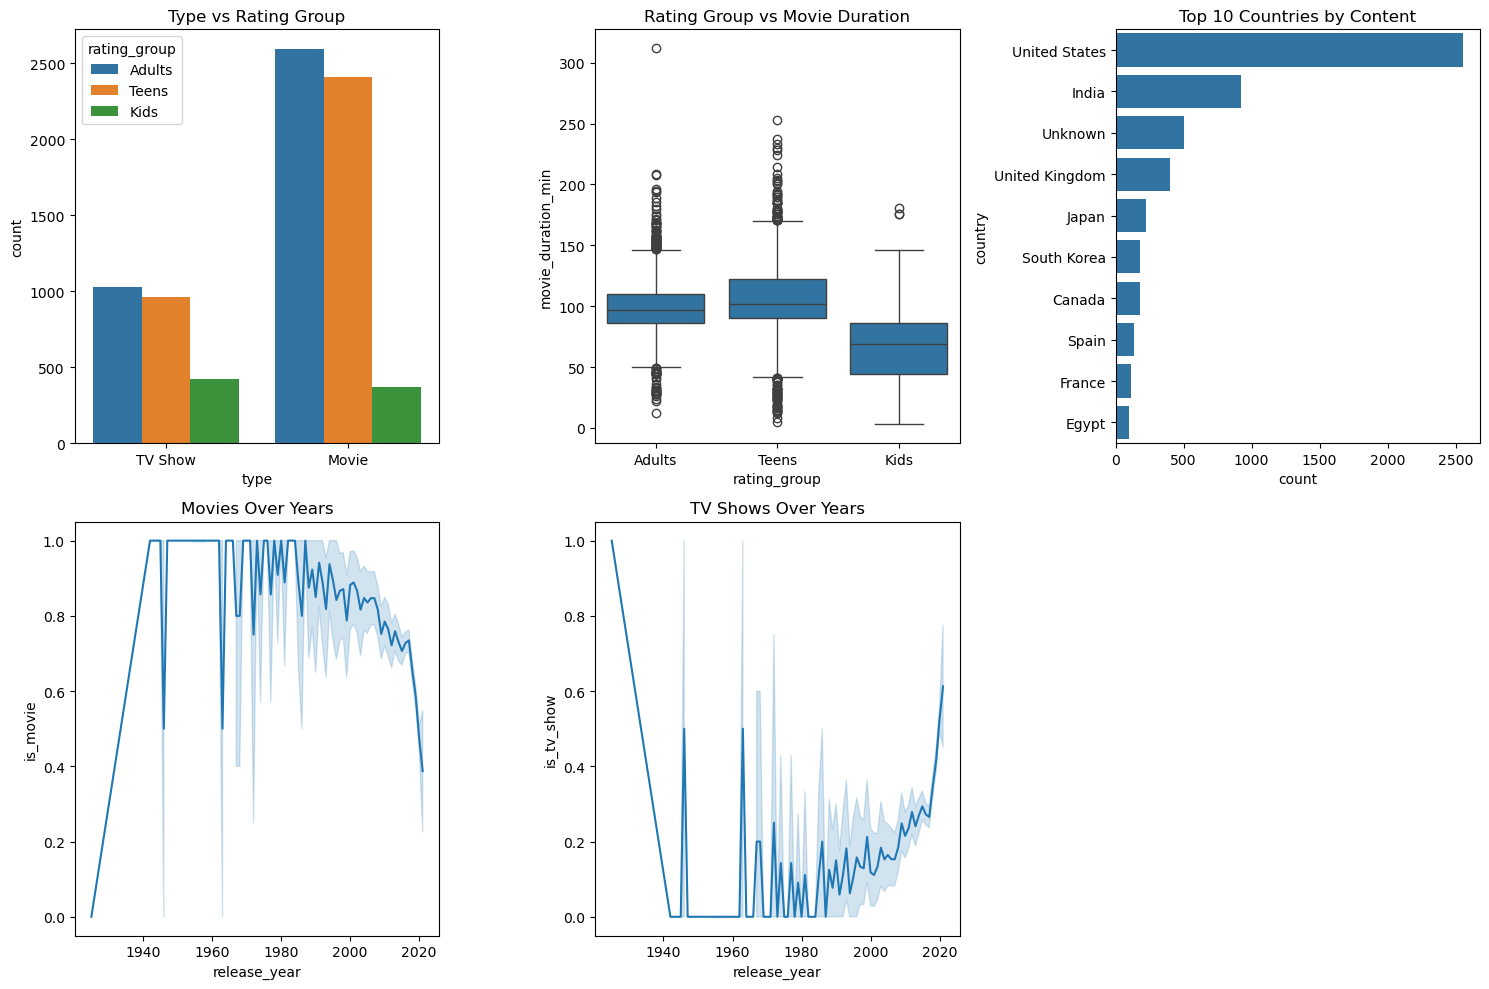

In [36]:
# BIVARIATE ANALYSIS
# Purpose: Understand relationships between two variables

plt.figure(figsize=(15, 10))

# Important to see how rating differs between Movies and TV Shows
plt.subplot(2,3,1)
sns.countplot(x='type', hue='rating_group', data=df)
plt.title('Type vs Rating Group')

# Important to check if adult movies are longer than kids/teen movies
plt.subplot(2,3,2)
sns.boxplot(x='rating_group', y='movie_duration_min', data=df)
plt.title('Rating Group vs Movie Duration')

# Important to identify top content-producing countries
plt.subplot(2,3,3)
sns.countplot(
    y='country',
    data=df,
    order=df['country'].value_counts().head(10).index
)
plt.title('Top 10 Countries by Content')

# Important to analyze movie growth trend over time
plt.subplot(2,3,4)
sns.lineplot(x='release_year', y='is_movie', data=df)
plt.title('Movies Over Years')

# Important to analyze TV show growth trend over time
plt.subplot(2,3,5)
sns.lineplot(x='release_year', y='is_tv_show', data=df)
plt.title('TV Shows Over Years')

plt.tight_layout()
plt.show()


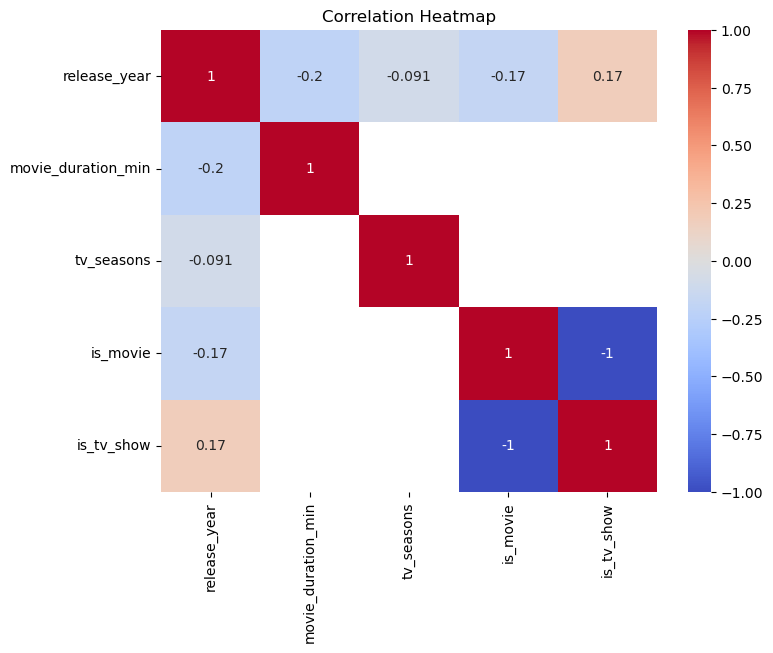

In [38]:
#heat map
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['release_year', 'movie_duration_min', 'tv_seasons', 'is_movie', 'is_tv_show']]
      .corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


In [40]:
#feature engineering
#creating a new column which has title,description,listed_in,cast 
df['content_text'] = (
    df['title'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['listed_in'].fillna('') + ' ' +
    df['cast'].fillna('')
)


In [41]:
#converting our content which is text into vetro(numeric) to use the for co-sine similarity
# TF-IDF vectorization
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(df['content_text'])

In [42]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [48]:
cosine_sim

array([[1.        , 0.07484671, 0.04173925, ..., 0.00513536, 0.05206647,
        0.        ],
       [0.07484671, 1.        , 0.00957864, ..., 0.10681445, 0.00395739,
        0.        ],
       [0.04173925, 0.00957864, 1.        , ..., 0.01159211, 0.00332803,
        0.        ],
       ...,
       [0.00513536, 0.10681445, 0.01159211, ..., 1.        , 0.00478924,
        0.1116701 ],
       [0.05206647, 0.00395739, 0.00332803, ..., 0.00478924, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1116701 , 0.        ,
        1.        ]])

In [47]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 172462 stored elements and shape (7780, 5000)>

In [50]:
#Create the recommendation function.
#What it does:
#Takes a title
#Finds its index
#Uses cosine_sim
#Returns top similar titles
def recommend(title, df, cosine_sim, top_n=5):
    # Get index of the given title
    idx = df[df['title'] == title].index[0]

    # Get similarity scores for this title
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar titles (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get indices of recommended titles
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]


In [51]:
# Example test
recommend('Inception', df, cosine_sim, top_n=5)

3700                  Lockout
1942        El último testigo
298              Act of Valor
454         American Assassin
5787    Star Trek: Enterprise
Name: title, dtype: object

In [52]:
#saving files for deployment
import pickle

# Save cleaned dataframe
with open('df_cleaned.pkl', 'wb') as f:
    pickle.dump(df, f)

# Save TF-IDF vectorizer
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save cosine similarity matrix
with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)
